# Lab 1: PyTorch basic practice

###1. import the required libraries

In [ ]:
import cv2
import torch
import glob
import numpy as np

####2. Read in the images (1.png, 2.png, 3.png, 4.png) in the current directory and save them to a list (so the length of this list is 4). Each element in this list is a numpy array (an image). All the images have the same shape **(height, width, channel)**, which is (555, 695, 3) in this **lab**.

In [ ]:
img_files = sorted(glob.glob("*.png")) # sorted list of image files in order

img_list = [] # a list used to save all the images in the current directory
for img in img_files:
    image = cv2.imread(img)
    img_list.append(image)

####3. Convert "**img_list**" to a 4-D tensor "**img_tensor**".The shape of this tensor is **(b,c,h,w)**. Where
b: batch size, which is 4 in this lab

c: the number of channels. Since they are all color images, it is 3.

h: the height of each image. 555

w: the width of each image. 695

In [ ]:
img_tensor = torch.tensor(img_list)
img_tensor = torch.permute(img_tensor, (0, 3, 1, 2))  # permute: reorder dimensions
img_tensor.shape  # torch.Size([4, 3, 555, 695]), (b=4,c=3,h=555,w=695)

torch.Size([4, 3, 555, 695])

#### 4. Split the 4-D tensor "img_tensor" into three new 4-D tensors based on the blue, green and red channels of the image, and name them "blue_tensor", "green_tensor" and "red_tensor" (because OpenCV chooses BGR color format )

In [ ]:
blue_tensor, green_tensor, red_tensor = torch.tensor_split(img_tensor, 3, dim=1) # split into 3 RGB tensors

####5. For every image, increase each pixel value of the green channel by 40, increase each pixel value of the blue channel by 10, and decrease each pixel value of the red channel by 20. This operation should be performed directly on the three tensors (blue_tensor, green_tensor, red_tensor)

In [ ]:
# Modify pixel values
green_tensor += 40  # increase by 40
blue_tensor += 10  # increase by 10
red_tensor -= 20  # decrease by 20

# Manual tuning (for values going past 0 or 255):
# when pixel value goes below 0, stays 0
# when pixel value goes above 255, stays 255
green_tensor[green_tensor < 40] = 255
red_tensor[(red_tensor > 235) & (green_tensor > 40)] = 0
blue_tensor[(blue_tensor < 40) & (green_tensor > 254)] = 255

#### 6. Combine/Merge these three revised tensors (green_tensor, blue_tensor, red_tensor) into a new one and convert it into a numpy array that can be visualized by OpenCV. Plot these new 4 images.

Please note that the order of the color format is blue, green and red.
And the shape of an image（numpy array）that can be visualized is （height, width, channel)

1. To convert a tensor to a numpy array, you can use x.numpy(), where x is a tensor.  
2. Google colab crashes if you try to display image using *cv2.imshow()* ,instead import ***from google.colab.patches import cv2_imshow*** and display using **cv2_imshow(<image>)**

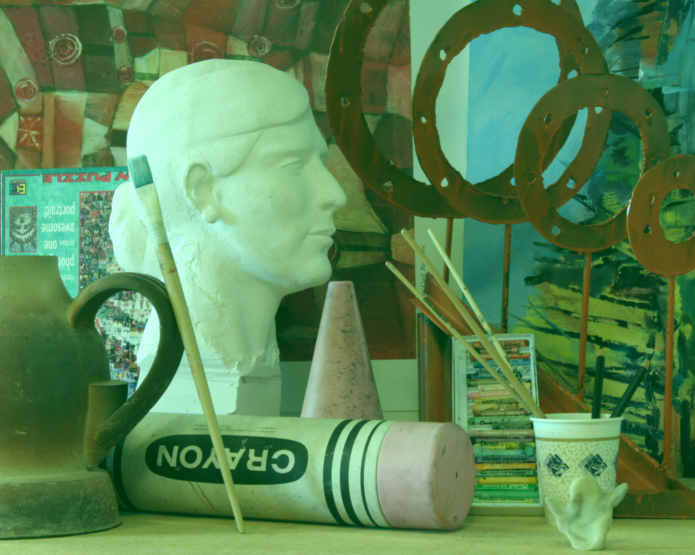

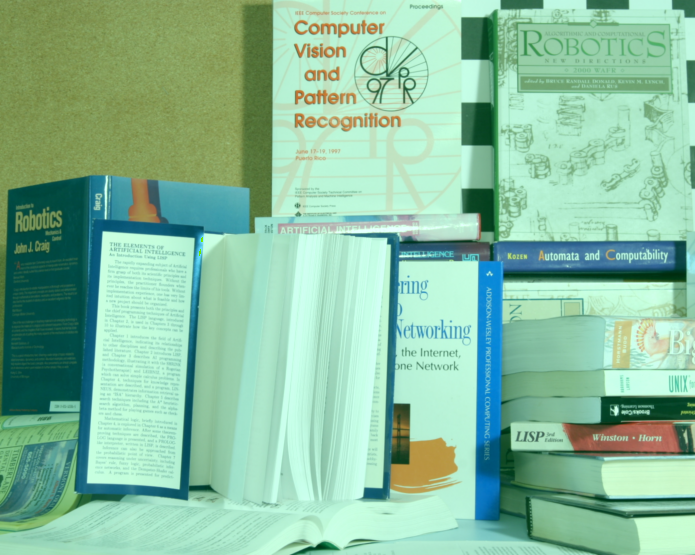

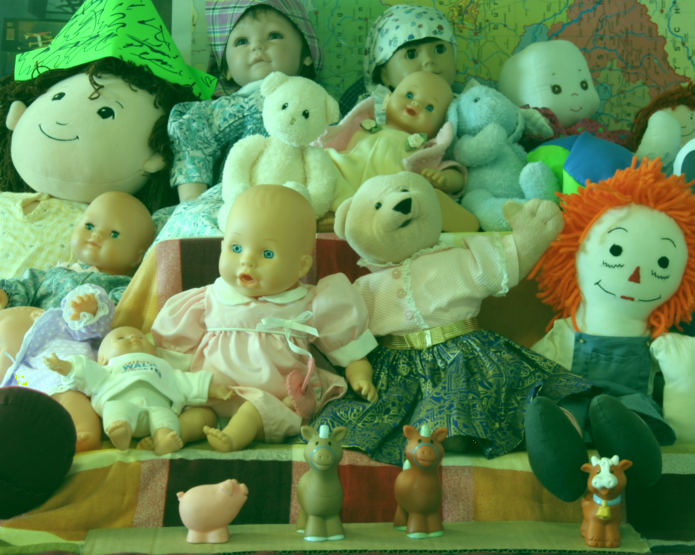

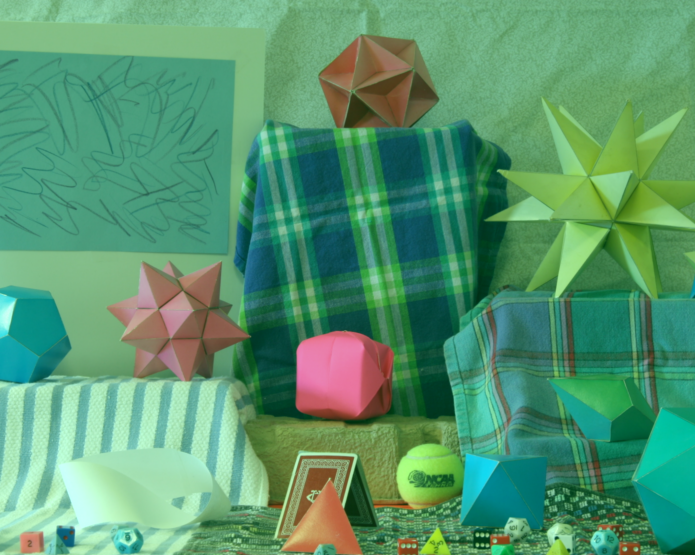

In [ ]:
from google.colab.patches import cv2_imshow # import image display

combined_tensor = torch.cat([red_tensor, green_tensor, blue_tensor], dim=1)  # concatenate

combined_array = combined_tensor.numpy()  # convert tensor to numpy array

# Reshape the array to match the format (batch, height, width, channels)
combined_array = combined_array.transpose(0, 2, 3, 1)

# Display modified images using cv2_imshow
for i in range(4):
    modified_img = combined_array[i]
    cv2_imshow(cv2.cvtColor(modified_img.astype(np.uint8), cv2.COLOR_BGR2RGB))
    print()